<a href="https://colab.research.google.com/github/Balaji430/Cotton-disease/blob/master/Cotton_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/My Drive/Cotton-Disease-Prediction-Deep-Learning-master/data/train'
valid_path = '/content/drive/My Drive/Cotton-Disease-Prediction-Deep-Learning-master/data/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Cotton-Disease-Prediction-Deep-Learning-master/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton-Disease-Prediction-Deep-Learning-master/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton-Disease-Prediction-Deep-Learning-master/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 1055s 17s/step - loss: 3.1447 - accuracy: 0.7248 - val_loss: 0.2823 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 37s 603ms/step - loss: 0.6539 - accuracy: 0.8821 - val_loss: 0.1724 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 37s 603ms/step - loss: 0.8132 - accuracy: 0.8760 - val_loss: 6.4233e-04 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 37s 608ms/step - loss: 0.6572 - accuracy: 0.9108 - val_loss: 0.2242 - val_accuracy: 0.8889
Epoch 5/20
61/61 [==============================] - 37s 603ms/step - loss: 0.5475 - accuracy: 0.9298 - val_loss: 0.7405 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 37s 601ms/step - loss: 0.4549 - accuracy: 0.9329 - val_loss: 1.9153e-04 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 37s 60

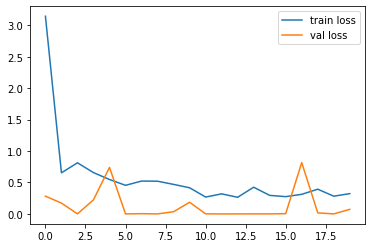

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

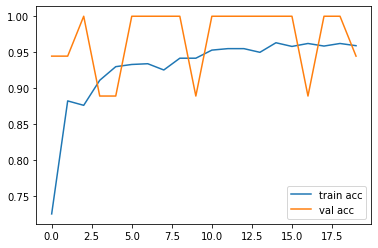

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [4.4255708e-24, 1.3166492e-36, 1.0000000e+00, 1.1523724e-30],
       [9.3281007e-01, 4.6125595e-35, 7.3964571e-11, 6.7189932e-02],
       [7.5964415e-14, 1.2267917e-16, 1.0000000e+00, 8.4503826e-09],
       [1.0000000e+00, 1.1737271e-20, 4.4881036e-23, 3.4048846e-32],
       [1.8564813e-21, 9.5379876e-04, 7.9519546e-21, 9.9904615e-01],
       [8.4491448e-27, 1.0000000e+00, 3.7899100e-26, 1.5880842e-11],
       [8.6005682e-16, 2.7496218e-22, 1.0000000e+00, 5.8927246e-10],
       [4.2596973e-33, 6.9587152e-30, 2.2738825e-35, 1.0000000e+00],
       [1.1092158e-22, 1.1531947e-15, 1.9736390e-21, 1.0000000e+00],
       [6.0579149e-36, 1.0000000e+00, 4.5900105e-33, 6.7064517e-27],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 8.0965435e-32],
       [2.2166374e-17, 7.0938653e-01, 2.9061347e-01, 2.3369604e-18],
       [8.3198032e-12, 6.9839503e-23, 1.0000000e+00, 2.6147118e-17],
       [9.9957663e-01, 4.2340011e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 2, 0, 2, 0, 3, 1, 2, 3, 3, 1, 1, 1, 2, 0, 1, 3, 3])